# Exercise worksheet no 9

# Hackathon II

### Climate model emulation

*Machine learning in climate and environmental sciences, winter semester 2023, Jun.-Prof. Peer Nowack, peer.nowack@kit.edu*

*Chair for AI in Climate and Environmental Sciences, https://ki-klima.iti.kit.edu*

**Learning objectives:** The goal of this hackathon is to provide you with another realistic climate science example for training and assessing a range of machine learning (ML) algorithms. You will tackle an actual research question: *can we learn a ML model to emulate the behaviour of a state-of-the-art climate model to make climate change projections?* You will use training data from simulations conducted with the Norwegian climate model [NorESM2-LM](https://gmd.copernicus.org/articles/13/6165/2020/), which participated in the [Coupled Model Intercomparison Project phase 6](https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6). The ML problem formulation is derived from the benchmark dataset ClimateBench ([Watson-Parris et al. JAMES 2022](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002954)), which also used NorESM2-LM. ClimateBench, in turn, is a subset of the more recent ClimateSet ([Kaltenborn et al. NeurIPS 2023](https://arxiv.org/abs/2311.03721)), which includes data produced by 36 different climate models.

#### Background

As already discussed in the lectures, climate models are process-based numerical models that can simulate long-term climate change scenarios. For another easy-to-read yet fairly comprehensive summary see e.g. [this blog post by CarbonBrief](https://www.carbonbrief.org/qa-how-do-climate-models-work/). If the direct link is blocked in your browser, you might need to re-enter the url (copy-paste, or via click on url + enter); a simple re-fresh will likely not suffice.

**Key inputs to climate models** are (changing) boundary conditions, for example atmospheric greenhouse gas concentrations and/or their emissions (in particular, carbon dioxide, methane). In addition, changing emissions in aerosols and their precursors are of great importance (in particular, sulphur dioxide and black carbon). With their representation of processes of relevance to short-term weather and long-term climate (from the deep oceans, over clouds, to the cryosphere), climate models can provide self-consistent climate change projections for many variables of interest.

**Key outputs of climate models** for policy-informing analyses include surface temperature (cf. global warming) and precipitation (cf. droughts, floods). Note that the term *precipitation* subsumes rainfall, snow, hail, etc., i.e. falling products of condensation of water vapour in the atmosphere. 

Here, you are tasked with building a **ML regression model of your choice** to predict daily precipitation rates $pr$ (mm/day) - as would be simulated by NorESM2-LM - under a variety of greenhouse gas and aerosols climate forcing conditions. For simplicity, we will approximate the changing forcing conditions by focusing on global mean changes in carbon dioxide (CO$_2$), methane (CH$_4$), sulphur dioxide (SO$_2$), and black carbon (BC). 

In addition, to predict regional precipitation rates on a daily timescale, you will consider the atmospheric dynamical situation for a given day around the grid-point of interest, which, in this case, is a central European area including the city of Karlsruhe (KA). To characterize dynamics, we will focus on sea level pressure (SLP) data at the same grid location and at 99 further grid points surrounding this grid point. In other words, you will learn a function $f_{ML}$

$$
\text{pr}(t)_{\text{KA}} = f_{ML}(\text{CO}_2, \text{CH}_4, \text{SO}_2, \text{BC}, \mathbf{SLP}_\text{KA})(t)
$$

Of course, NorESM2-LM itself simulates the entire atmosphere and ocean globally, so we are selecting specific parts of its inputs and outputs for our regressions. Typically, for ClimateBench and ClimateSet, ML models are trained to predict all grid locations worldwide, with the aim to accelerate the entire policy-informing output generation.

#### Hackathon set-up and rules

Everyone has access to the same training data for the predictand time series (precipitation rates at a grid location including the city of KA) and predictors (the forcers, plus SLP to represent the dynamical weather state). We provide daily data for six scenarios simulated with NorESM2-LM, which you can use as you wish for training, cross-validation, and testing. Specifically, this includes four [Shared Socioeconomic Pathway (SSP) scenarios](https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/), which make different assumptions about human development (and thus, forcer emissions) until the year 2100, plus a *historical* scenario aiming to represent changes in climate forcing conditions between the years 1850 to 2014, plus a long *pre-industrial* (piControl) baseline run to characterize internal variability in NorESM2-LM in the absence of anthropogenic forcings. We recommend that you re-train your final best model version, with the best hyperparameter settings, on all six scenarios, or at least on all forced scenarios, to avoid extrapolation.

**For your final submission,** 
- create a file in which you save your model (with whatever Python tool required) and
- provide a separate cell at the end of this notebook which demonstrates how we can load the model and use it to predict. Ideally, we should be able to re-use your notebook by simply replacing the data you use in the prediction example with our new test data. This would also involve any pre-processing steps (e.g. standard-scaling, window time horizon for LSTM approaches etc.) we would need to apply to both input and output data.

Before uploading your folder with this final file and example application, make sure to delete the training data from the data folder to make your submission as compact as possible. If your model file is too large for upload to Ilias, you can share a cloud link with us by email (peer.nowack@kit.edu), e.g. using bwsync, Dropbox, or similar.

**Your task** is to build the **best possible ML model** in terms of generalizable predictive skill. There are no particular restrictions. However, you might want to run and optimize a cheap, linear approach and a basic non-linear approach first to establish baselines to beat for yourself. **If you try out multiple models**, please make clear which model you would like us to evaluate. You may re-use code from previous exercises. In addition, we provide a few - not yet particularly optimized - code examples below.

*Hint*: We provide you with a relatively large number of potential training samples. If you want to try out expensive model architectures, it might make sense to first find and select the best architecture using a much reduced subset of samples. Since it will still be important to train on a variety of scenarios, it might be helpful to only use every j-th day in the data at first, using indexing such as `X_train[::j,:]` and, consistently, `Y_train[::j]`. 

#### How we create a hackathon ranking
The only way to objectively rank your solutions is to hold back separate test data, which we will apply your submitted best solution to. We will measure prediction skill in terms of the `mean_squared_error`. The best performing solutions will be discussed in the exercise class and will be - as is characteristic for this module - rewarded with chocolate (or, if desired, an appropriate alternative). If successful, you might even inspire the approach for a current research project on climate model emulation.

## Good luck!

In case of questions, feel free to post on the **Discussion Board** on Ilias. As always, do also feel free to run additional data exploration to inform your model design, see e.g. the blog posts [here](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python) and [here](https://towardsdatascience.com/15-data-exploration-techniques-to-go-from-data-to-insights-93f66e6805df).

#### Illustration of the SSP scenarios

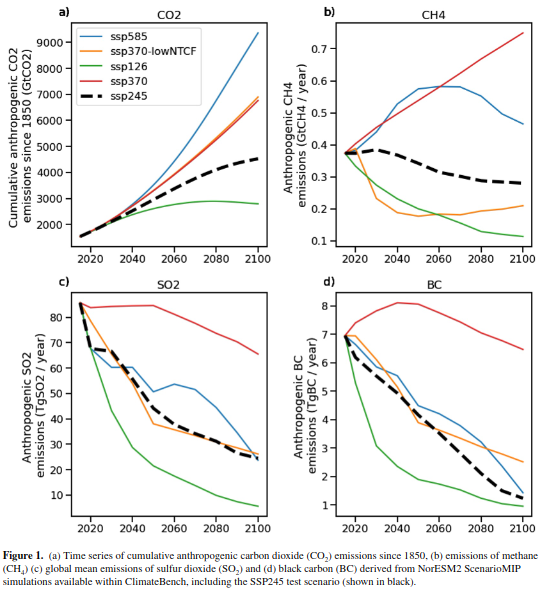

Illustration from the ClimateBench paper, highlighing scenario-dependent differences across the SSPs in terms of the greenhouse gas and aerosols emissions. Here, you will use data from SSP5-8.5 (the most extreme global warming scenario with the highest CO$_2$ emissions), SSP3-7.0, SSP2-4.5, and SSP1-2.6 (the strongest climate change mitigation scenario). For simplicity, we will use globally averaged (spatially weighted) time series of each of these four forcing agents. Note that, especially for aerosols, this is not ideal because there can be locally emphasized impacts of their emissions on weather (and climate), see e.g. these papers by [Shindell et al. (2012)](https://acp.copernicus.org/articles/12/6969/2012/) and [Bollasina et al. (2011)](https://www.science.org/doi/10.1126/science.1204994).

#### Load Python and the "ML-climate" kernel

As always: if you are working on your own computer, now select the "ML-climate" kernel. This option should exist for you if you followed the Anaconda 3 and subsequent installation instructions provided on Ilias. Alternatively, you can run the notebook on Google Colab. As usual, you will need to use e.g. the Colab data loader whenever files need to be read from the exercise folder (see Worksheets 1 and 2), and certain packages might still need to be installed using pip.

In [ ]:
### uncomment after installation
### needed for more advanced Gaussian process regression
!pip install GPy

In [ ]:
# load a few Python packages that might be useful for you
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib import rcParams
import xarray as xr
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
import netCDF4
### neural network packages
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.regularizers import l2
from sklearn.neural_network import MLPRegressor
from tensorflow.keras import layers
from tensorflow.keras import activations
import torch
import torch.nn as nn
import torch.optim as optim
import skorch
from skorch import NeuralNetRegressor
import cftime
import GPy
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel as WK,\
ExpSineSquared as ESS, RationalQuadratic as RQ, Matern as M, DotProduct
import datetime

#### Load and visualize the data
We have a bunch of different scenarios, let's load and explore these quickly.

In [ ]:
# you might need to adjust the paths depending on your operating system
# on Google Colab you will need the manual loader function (as in previous Worksheets)
def annual_index(start_year, end_year):
    idx = [cftime.DatetimeNoLeap(year, 1, 1, 12, 0, 0) for year in range(start_year, end_year + 1)]
    idx[-1] = cftime.DatetimeNoLeap(end_year, 12, 31, 12, 0, 0)
    return idx

def load_and_process_met_data(psl_path, pr_path, forcings_path, start_year, end_year, fac=86400):
    annual_time_index = annual_index(start_year, end_year)
# fac = conversion factor for precipitation: handed over by CMIP6 in kg m⁻2 s⁻1, which is equal to mm s⁻1
# convert to standard mm day⁻1
    ds_slp = xr.open_dataset(psl_path)
    ds_pr = xr.open_dataset(pr_path).squeeze()
    ds_pr['pr'] = ds_pr['pr'] * fac
    
    ds_forcings = xr.open_dataset(forcings_path)
    ds_forcings['time'] = annual_time_index
    ds_forcings = ds_forcings.resample(time='1D').asfreq()
    ds_forcings = ds_forcings.interpolate_na(dim='time', method='linear').squeeze()

    return ds_slp, ds_pr, ds_forcings

### now do something slightly different for the pre-industrial simulation. 
### in that case we just take over the forcing conditions at the beginning of the historical simulation
### and keep those constant
def create_picontrol_forcing(historical_path, start_year, end_year):
    ds_historical = xr.open_dataset(historical_path)
    dict_picontrol_forcings = {}
    for var_name in ds_historical.data_vars:
        value_1850 = ds_historical[var_name].isel(time=0, lat=0, lon=0).values
        new_values = np.full((end_year - start_year + 1, 1, 1), value_1850)
        dict_picontrol_forcings[var_name] = (('time', 'lon', 'lat'), new_values)
    annual_time_index = annual_index(start_year, end_year)    
    ds_picontrol_forcings = xr.Dataset(dict_picontrol_forcings, coords={'time': annual_time_index, 'lon': ds_historical['lon'], 'lat': ds_historical['lat']})
    ds_picontrol_forcings = ds_picontrol_forcings.resample(time='1D').asfreq()
    ds_picontrol_forcings = ds_picontrol_forcings.interpolate_na(dim='time', method='linear').squeeze()
    
    return ds_picontrol_forcings

psl_base_path = './data/psl_pr/KA_psl_{}.nc'
pr_base_path = './data/psl_pr/KA_pr_{}.nc'
forcings_base_path = './data/forcers/inputs_{}_fldmean.nc'

# loading and pre-processing datasets
ds_historical_psl, ds_historical_pr, ds_historical_forcings = load_and_process_met_data(psl_base_path.format('historical_r1i1p1f1'), pr_base_path.format('historical_r1i1p1f1'), forcings_base_path.format('historical'), 1850, 2014)
ds_picontrol_forcings = create_picontrol_forcing(forcings_base_path.format('historical'), 1600, 2100)
ds_picontrol_psl = xr.open_dataset('./data/psl_pr/KA_psl_piControl_r1i1p1f1.nc')
ds_picontrol_pr = xr.open_dataset('./data/psl_pr/KA_pr_piControl_r1i1p1f1.nc').squeeze()
ds_picontrol_pr['pr'] = ds_picontrol_pr['pr']*86400
# repeat the process for each SSP scenario
for scenario in ['ssp126', 'ssp245', 'ssp370', 'ssp585']:
    locals()[f'ds_{scenario}_psl'], locals()[f'ds_{scenario}_pr'], locals()[f'ds_{scenario}_forcings'] = load_and_process_met_data(psl_base_path.format(scenario + '_r1i1p1f1'), pr_base_path.format(scenario + '_r1i1p1f1'), forcings_base_path.format(scenario), 2015, 2100)


#### Let's visualize the data 

As you can see, the data has been pre-normalized by ClimateBench: e.g. for CO2, the pre-industrial value is close to zero (the true value was around 280 ppmv), whereas today we are at around [420 ppmv](https://gml.noaa.gov/ccgg/trends/). However, since we are interested in relative changes, that's OK! Just don't take the data at face value. For sea level pressure, we just plot the first entry `[0,0]` on the grid of 10$\times$10 cells, see the lon/lat coordinates in `ds_..._psl` objects for details on the coordinates of the SLP field surrounding our target grid point that includes the city of KA.

As you can see, precipitation rates and SLP are far more variable than the long-term trends in the climate forcers. SLP is meant to give us an idea of the daily dynamical situation to also model the high internal variability in precipitation rates.

In [ ]:
# convert cftime dates to datetime for plotting
def convert_to_datetime(cftime_dates):
    return [datetime.datetime(date.year, date.month, date.day, date.hour, date.minute, date.second) for date in cftime_dates]

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# forcings and titles
forcings = ['CO2', 'CH4', 'SO2', 'BC', 'psl', 'pr']
titles = ['CO$_2$', 'CH$_4$', 'SO$_2$', 'Black carbon', 'Sea level pressure (Pa) near KA', 'Precipitation rate (mm/day) grid point KA']

# List of scenarios
scenarios = ['picontrol', 'historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']
labels = ['piControl', 'historical', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0', 'SSP5-8.5']

# loop over axes, scenarios etc.
for i, forcing in enumerate(forcings):
    ax = axs[i // 2, i % 2]
    for scenario, label in zip(scenarios, labels):
        dataset = locals()[f'ds_{scenario}_forcings'] if i < 4 else locals()[f'ds_{scenario}_{forcing}']
        time_data = convert_to_datetime(dataset['time'].values)
        if forcing in ['psl', 'pr']:
            data = dataset[forcing][:,0,0] if forcing == 'psl' else dataset[forcing]
        else:
            data = dataset[forcing]
        ax.plot(time_data, data, label=label)
    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.show()

From these plots, we can see that SSP2-4.5 might be a good scenario to ensure that we do not have to extrapolate on the test data. Let's define our input and output arrays accordingly. In the evaluation, we will make sure that your model will not have to extrapolate either beyond the scenarios provided here. Still, we recommend to retain your final model (i.e. the one with the best objectively identified hyperparameter settings) on all data available here, i.e. including SSP2-4.5, to achieve optimal performance. 

Note that we cannot guarantee that any selection of scenarios for training will work best; it is just an intuition to use all the data provided to you in the most effective way...

In [ ]:
# SLP range goes from 2.5W to 20E, 40.74N to 57.79N (area around target grid point)
ds_picontrol_psl

In [ ]:
# precipitation rates are at the grid location centred on 7.5E, 48.32N
# with longitude resolution of 2.5 degrees and latitude resolution of around 2 degrees
# so this should include KA at ca. 49N and 8E
ds_picontrol_pr

In [ ]:
### lets create predictor and predictand arrays...leaving SSP2-4.5 for testing
def flatten_and_concat(ds):
    flattened_arrays = [ds[var].values.flatten() for var in ds.data_vars]
    return np.vstack(flattened_arrays).T
picontrol_inputs = np.hstack((flatten_and_concat(ds_picontrol_forcings),ds_picontrol_psl['psl'].values.reshape(len(ds_picontrol_psl.time),-1)))
print(picontrol_inputs.shape)
historical_inputs = np.hstack((flatten_and_concat(ds_historical_forcings),ds_historical_psl['psl'].values.reshape(len(ds_historical_psl.time),-1)))
print(historical_inputs.shape)
ssp1_inputs = np.hstack((flatten_and_concat(ds_ssp126_forcings),ds_ssp126_psl['psl'].values.reshape(len(ds_ssp126_psl.time),-1)))
print(ssp1_inputs.shape)
ssp2_inputs = np.hstack((flatten_and_concat(ds_ssp245_forcings),ds_ssp245_psl['psl'].values.reshape(len(ds_ssp245_psl.time),-1)))
print(ssp2_inputs.shape)
ssp3_inputs = np.hstack((flatten_and_concat(ds_ssp370_forcings),ds_ssp370_psl['psl'].values.reshape(len(ds_ssp370_psl.time),-1)))
print(ssp3_inputs.shape)
ssp5_inputs = np.hstack((flatten_and_concat(ds_ssp585_forcings),ds_ssp585_psl['psl'].values.reshape(len(ds_ssp585_psl.time),-1)))
print(ssp5_inputs.shape)

X_train = np.vstack((picontrol_inputs,historical_inputs,ssp1_inputs,ssp3_inputs,ssp5_inputs))
X_test = ssp2_inputs
print(X_train.shape, 'X_train shape')
print(X_test.shape, 'X_test shape')

Y_train = np.hstack((ds_picontrol_pr['pr'].values,ds_historical_pr['pr'].values,ds_ssp126_pr['pr'].values,ds_ssp370_pr['pr'].values,ds_ssp585_pr['pr'].values))
Y_train = Y_train[:,np.newaxis]
print(Y_train.shape, 'Y_train shape')
Y_test = ds_ssp245_pr['pr'].values
Y_test = Y_test[:,np.newaxis]
print(Y_test.shape, 'Y_test shape')

#### Let's standard-scale the input data, then train and cross-validate a ridge regression model
Note: there is a time order here, but due to the unequal simulation lengths it is harder to define validation sets of
equal sizes, so we take a shortcut here using simple 5-fold cross-validation.

In [ ]:
scaler_X = StandardScaler().fit(X_train)
X_train_norm = scaler_X.transform(X_train[:,:])
### alternative MinMaxScaler, used below for LSTMs
scaler_min_max = MinMaxScaler(feature_range=(0,1)).fit(X_train)

alpha_i=[0.03,0.1,0.3,1,10,30,100,300,1000,3000,10000,30000]
parameters = {
    'alpha': alpha_i,
    'fit_intercept': [True],
    'max_iter':[1000],
    'random_state':[100]
             }
regressor_type = Ridge()
regr = GridSearchCV(regressor_type,parameters,cv=5,n_jobs=-1,refit=True)
regr.fit(X_train_norm,Y_train)
print(regr.best_estimator_)

#### Evaluate initial ridge regresson
Let's see how well we do on the SSP2-4.5 scenario. For further interpretation of your results, you could look into the ridge coefficients for the forcers and SLP predictors; for the latter even a visualization might help...

Can you spot any potential issues with this linear model?

In [ ]:
X_test_norm = scaler_X.transform(X_test)
Y_test_pred = regr.best_estimator_.predict(X_test_norm)
nr_timesteps = Y_test_pred.shape[0]
plt.plot(np.arange(0,nr_timesteps),Y_test,label='True SSP2-4.5 precip data')
plt.plot(np.arange(0,nr_timesteps),Y_test_pred,label='Ridge predictions')
plt.xlabel('Time (days)')
plt.ylabel('Precipitation rate (mm/day)')
plt.legend()
plt.show()
### let's repeat this focusing on the last year...
nr_timesteps = Y_test_pred[-365:,:].shape[0]
plt.plot(np.arange(0,nr_timesteps),Y_test[-nr_timesteps:],label='True SSP2-4.5 precip data')
plt.plot(np.arange(0,nr_timesteps),Y_test_pred[-nr_timesteps:],label='Ridge predictions')
plt.xlabel('Time (days)')
plt.ylabel('Precipitation rate (mm/day)')
plt.legend()
plt.show()
### Let's also print the final evaluation error
print('Mean squared error: ', mean_squared_error(Y_test,Y_test_pred))
print('R2-score: ', r2_score(Y_test,Y_test_pred))

# Your turn!

Build a better model!

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
### In this final cell, save your model to the folder you will upload, 
### demonstrate how it would be loaded and used for prediction.
### also: in this cell, load data into X_test, normalize it as intended by you (or not) and use it
### in your prediction example. Similarly if you apply dimension reduction! (might need a separate trained and saved object)
### in particular, if you standard-scale, re-define this scaling, don't assume that we can use 
### objects defined above. This cell should be self-reliant.
### we should simply be able to re-use this cell by replacing the path to the files you load here
### of course, you can re-use code from above to produce X_test and the scaler object
### Thank you!

## A few more baseline models

A few implementations of methods discussed in the lectures. You will need to tune those, change their architectures etc. as it fits.

#### Gaussian process regression

First, using scikit-learn

In [ ]:
### see what happens if you increase the number of samples used during training!
def fit_GP(X,Y):
    kernel = 10 * RBF(1, (1e-2, 1e2)) + WK(1) +M()#+ DotProduct()
    gp = GPR(kernel=kernel,copy_X_train=False)
    parameters = {
        # 'alpha':[0.0,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,20,25,30,40,50,60,70,80,90,100,150,200,250,300],
        'alpha':[0.0,0.1],
        'n_restarts_optimizer': [10],
        'normalize_y': [True],
                    }
    cv_obj = KFold(n_splits=5)
    regr = GridSearchCV(gp,parameters,cv=cv_obj,n_jobs=8,refit=True)
    # scaler_x = StandardScaler().fit(X)
    # X_norm = scaler_x.transform(X)    
    regr.fit(X, Y)
    print(regr.best_estimator_)
    return regr#, scaler_x
model_GPR_sklearn = fit_GP(X_train_norm[0:1000],Y_train[0:1000])

In [ ]:
Y_test_pred = model_GPR_sklearn.predict(X_test_norm)
nr_timesteps = Y_test_pred.shape[0]
plt.plot(np.arange(0,nr_timesteps),Y_test,label='True SSP2-4.5 precip data')
plt.plot(np.arange(0,nr_timesteps),Y_test_pred,label='GPR predictions')
plt.xlabel('Time (days)')
plt.ylabel('Precipitation rate (mm/day)')
plt.legend()
plt.show()
### let's repeat this focusing on the last year...
nr_timesteps = Y_test_pred[-365:].shape[0]
plt.plot(np.arange(0,nr_timesteps),Y_test[-nr_timesteps:],label='True SSP2-4.5 precip data')
plt.plot(np.arange(0,nr_timesteps),Y_test_pred[-nr_timesteps:],label='GPR predictions')
plt.xlabel('Time (days)')
plt.ylabel('Precipitation rate (mm/day)')
plt.legend()
plt.show()
### Let's also print the final evaluation error
print('Mean squared error: ', mean_squared_error(Y_test,Y_test_pred))
print('R2-score: ', r2_score(Y_test,Y_test_pred))

#### Gaussian process regression using GPy

Now using the GPy package:

In [ ]:
def create_sparse_gp_model(X_train, Y_train, num_inducing_points):
    kernel = GPy.kern.RBF(X_train.shape[1]) + GPy.kern.White(X_train.shape[1], variance=1)
    Z = X_train[:num_inducing_points, :].copy()  # Initial inducing points
    model = GPy.models.SparseGPRegression(X_train, Y_train, kernel, Z=Z)
    return model
    
model = create_sparse_gp_model(X_train_norm[::10,:], Y_train[::10,:], num_inducing_points=300)
model.optimize(messages=True)
    

In [ ]:
Y_test_pred, _ = model.predict(X_test_norm)
nr_timesteps = Y_test_pred.shape[0]
plt.plot(np.arange(0,nr_timesteps),Y_test,label='True SSP2-4.5 precip data')
plt.plot(np.arange(0,nr_timesteps),Y_test_pred,label='GPR predictions')
plt.xlabel('Time (days)')
plt.ylabel('Precipitation rate (mm/day)')
plt.legend()
plt.show()
### let's repeat this focusing on the last year...
nr_timesteps = Y_test_pred[-365:].shape[0]
plt.plot(np.arange(0,nr_timesteps),Y_test[-nr_timesteps:],label='True SSP2-4.5 precip data')
plt.plot(np.arange(0,nr_timesteps),Y_test_pred[-nr_timesteps:],label='GPR predictions')
plt.xlabel('Time (days)')
plt.ylabel('Precipitation rate (mm/day)')
plt.legend()
plt.show()
### Let's also print the final evaluation error
print('Mean squared error: ', mean_squared_error(Y_test,Y_test_pred))
print('R2-score: ', r2_score(Y_test,Y_test_pred))

#### LSTM 

Since we also want to take lagged relationships into account, we define new input and output arrays.

In [ ]:
### define new data
### lets create predictor and predictand arrays...leaving SSP2-4.5 for testing
### look_back defines the number of days in the past, which we also want to consider
### in our prediction

def create_LSTM_compatible_data(X, Y, look_back=1):
    total_samples = len(X) - look_back
    dataX = np.empty((total_samples, look_back + 1, X.shape[1]))
    dataY = np.empty(total_samples)
    for i in range(total_samples):
        dataX[i] = X[i:(i + look_back + 1), :]
        dataY[i] = Y[i + look_back]
        
    return dataX, dataY[:,np.newaxis]

lag=3
print(picontrol_inputs.shape)
picontrol_input_lstm, picontrol_output_lstm = create_LSTM_compatible_data(scaler_min_max.transform(picontrol_inputs),ds_picontrol_pr['pr'].values,look_back=lag)
print(picontrol_input_lstm.shape, '(#samples, #timesteps considered for prediction, #features) is expected by LSTM')
print(picontrol_output_lstm.shape)
historical_input_lstm, historical_output_lstm = create_LSTM_compatible_data(scaler_min_max.transform(historical_inputs),ds_historical_pr['pr'].values,look_back=lag)
ssp1_input_lstm, ssp1_output_lstm = create_LSTM_compatible_data(scaler_min_max.transform(ssp1_inputs),ds_ssp126_pr['pr'].values,look_back=lag)
ssp2_input_lstm, ssp2_output_lstm = create_LSTM_compatible_data(scaler_min_max.transform(ssp2_inputs),ds_ssp245_pr['pr'].values,look_back=lag)
ssp3_input_lstm, ssp3_output_lstm = create_LSTM_compatible_data(scaler_min_max.transform(ssp3_inputs),ds_ssp370_pr['pr'].values,look_back=lag)
ssp5_input_lstm, ssp5_output_lstm = create_LSTM_compatible_data(scaler_min_max.transform(ssp5_inputs),ds_ssp585_pr['pr'].values,look_back=lag)
X_train = np.vstack((picontrol_input_lstm,historical_input_lstm,ssp1_input_lstm,ssp3_input_lstm,ssp5_input_lstm))
X_test = ssp2_input_lstm
print(X_train.shape, 'X_train shape')
print(X_test.shape, 'X_test shape')
Y_train = np.vstack((picontrol_output_lstm,historical_output_lstm,ssp1_output_lstm,ssp3_output_lstm,ssp5_output_lstm))
print(Y_train.shape, 'Y_train shape')
Y_test = ssp2_output_lstm
print(Y_test.shape, 'Y_test shape')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
def create_lstm_model(neurons=50, dropout_rate=0.2):
    model = Sequential()
    # model.add(LSTM(neurons, input_shape=(lag+1, X_train.shape[2]), activation='relu',dropout=dropout_rate))
    model.add(LSTM(neurons, input_shape=(lag+1, X_train.shape[2]),dropout=dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = KerasRegressor(build_fn=create_lstm_model)
param_grid = {
    'neurons': [20],
    'dropout_rate': [0.0,0.1],
    'epochs': [10],
    'batch_size': [64]# You can include more epochs
}
regr_lstm = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
regr_lstm.fit(X_train,Y_train)
history = regr_lstm.best_estimator_.model.history
plt.plot(history.history['loss'], label='loss')
plt.xlabel('No epochs',size=16)
plt.ylabel('Error',size=16)
plt.legend()
plt.show()

In [ ]:
Y_test_pred = regr_lstm.predict(X_test)
nr_timesteps = Y_test_pred.shape[0]
plt.plot(np.arange(0,nr_timesteps),Y_test,label='True SSP2-4.5 precip data')
plt.plot(np.arange(0,nr_timesteps),Y_test_pred,label='LSTM predictions')
plt.xlabel('Time (days)')
plt.ylabel('Precipitation rate (mm/day)')
plt.legend()
plt.show()
### let's repeat this focusing on the last year...
nr_timesteps = Y_test_pred[-365:].shape[0]
plt.plot(np.arange(0,nr_timesteps),Y_test[-nr_timesteps:],label='True SSP2-4.5 precip data')
plt.plot(np.arange(0,nr_timesteps),Y_test_pred[-nr_timesteps:],label='LSTM predictions')
plt.xlabel('Time (days)')
plt.ylabel('Precipitation rate (mm/day)')
plt.legend()
plt.show()
### Let's also print the final evaluation error
print('Mean squared error: ', mean_squared_error(Y_test,Y_test_pred))
print('R2-score: ', r2_score(Y_test,Y_test_pred))

#### No cells below this line...